<a href="https://colab.research.google.com/github/SGRGit/gwOsc/blob/Main/DataPrepBlipGlitches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [518]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

In [0]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')
nb_path = '/content/notebooks'
os.symlink('/content/gdrive/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0,nb_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
!pip install --target=$nb_path gwpy --upgrade

  Using cached https://files.pythonhosted.org/packages/2d/e6/14f8cefc3ebd73e062323ed94ecc2ea943b3ab69137b2b9fc9df4087a9bc/gwpy-0.15.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d6/9e/616124723b7a8f2a5399f9288b056bb31f37222b0b7cae46f6bafaa42154/gwdatafind-1.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0e/46/ae6773894f7eacf53308086287897ec568eac9768918d913d5b9d366c5db/numpy-1.17.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6d/ff/67426ce11f9f3432e020f5d5ef796e1d8e1c2a76b555c8705177f4347f99/gwosc-0.4.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/06/cafdd44889200e5438b897388f3075b52a8ef01f28a17366d91de0fa2d05/h5py-2.10.0-cp36-cp36m-manylinux1_x86_64.whl
Processing /root/.cache/pip/wheels/5d/1e/4a/ab4122baed7d67f6abce65b2b12049d3bc7fe5dad24edf89df/ligo_segments-1.2.0-cp36-cp36m-linux_x86_64.whl
  Using cached https://files.pythonhosted.org/packag

In [0]:
import gwpy

In [0]:
from gwpy.timeseries import TimeSeries
data = TimeSeries.fetch_open_data('L1', 1132388183-2, 1132388183+2)

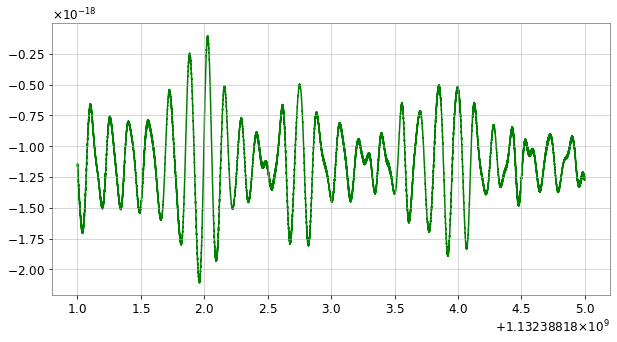

In [322]:
#t_value = np.linspace(1133090460-2, 1133090460+2, num = np.array(data).size)
t_value = np.linspace(1132388183-2, 1132388183+2, num = np.array(data).size)

f, (ax) = plt.subplots(1, 1)
f.set_size_inches(10,5)
ax.plot(t_value, data, 'g')

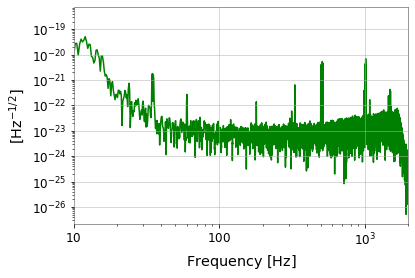

In [343]:
data_asd = data.asd(4, 2)
plot = data_asd.plot(color='g')
ax = plot.gca()
ax.set_xlim(10, 2000)
#ax.set_ylim(5e-24, 1e-21)
plot.show()

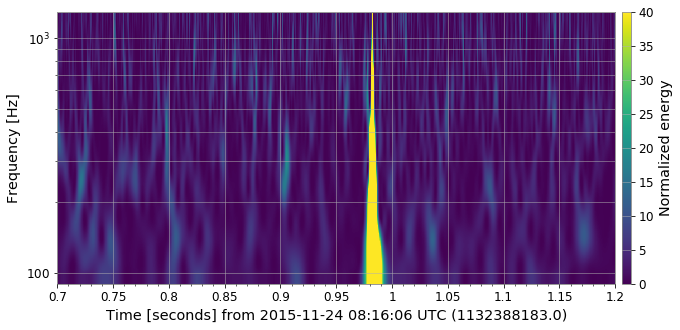

In [570]:
qtrans = data.q_transform(
    #whiten=False,  # already white
    #qrange=(4, 150),  # wider Q-transform range
    #outseg=(1133090460.5, 1133090460.8),  # region of interest
    outseg=(1132388183.7, 1132388184.2),  # region of interest
)
plot = qtrans.imshow(figsize=[10, 5])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_epoch(1132388183)
ax.set_ylabel('Frequency [Hz]')
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0, 40])
plot.show()

In [0]:
from gwpy.signal import filter_design
bp = filter_design.bandpass(50, 250, data.sample_rate)

notches = [filter_design.notch(line, data.sample_rate) for
           line in (60, 120, 180)]

In [0]:
zpk = filter_design.concatenate_zpks(bp, *notches)
datafilt = data.filter(zpk, filtfilt=True)

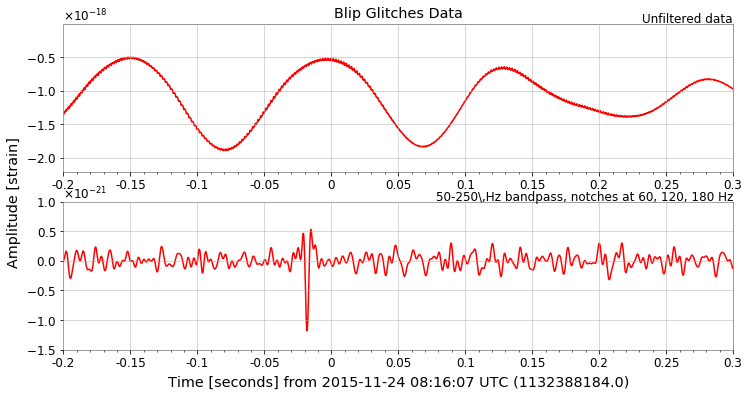

In [360]:
from gwpy.plot import Plot
plot = Plot(data, datafilt, figsize=[12, 6], separate=True, sharex=True, color='r')
ax1, ax2 = plot.axes
ax1.set_title('Blip Glitches Data')
ax1.text(1.0, 1.01, 'Unfiltered data', transform=ax1.transAxes, ha='right')
ax1.set_ylabel('Amplitude [strain]', y=-0.2)
ax2.set_ylabel('')
ax2.set_xlim(1132388183.8, 1132388184.3)
ax2.set_ylim(-1.5e-21, 1e-21)
ax2.text(1.0, 1.01, '50-250\,Hz bandpass, notches at 60, 120, 180 Hz', transform=ax2.transAxes, ha='right')
plot.show()

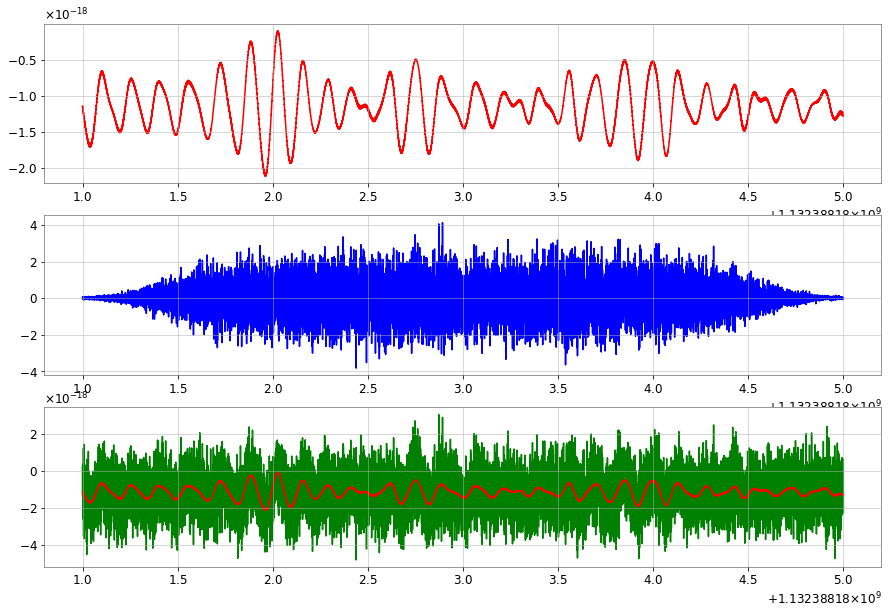

In [601]:
#t_value = np.linspace(1133090460-2, 1133090460+2, num = np.array(data).size)
t_value = np.linspace(1132388183-2, 1132388183+2, num = np.array(data).size)
#t_noise = np.linspace(0, 10, num=np.array(data).size)

from numpy import random
xn = data + noise
f, (ax1, ax2, ax3) = plt.subplots(3, 1)
f.set_size_inches(15,10)
ax1.plot(t_value, data, 'r')
ax2.plot(t_value, white, 'b')
ax3.plot(t_value, data_noise, 'g')
ax3.plot(t_value, data, 'r')

In [0]:
noise = TimeSeries(random.normal(scale=1e-18, size=4*4096), sample_rate=4*4096)

In [0]:
noise.xindex = data.xindex

In [0]:
data_noise = noise.inject(data)

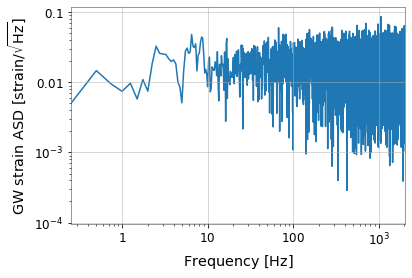

In [590]:
spectrum = white.asd()

plot = spectrum.plot()
ax = plot.gca()
#ax.set_xlim(40, 4000)
ax.set_ylabel(r'GW strain ASD [strain$/\sqrt{\mathrm{Hz}}$]')
#ax.set_ylim(1e-23, 3e-20)
plot.show()

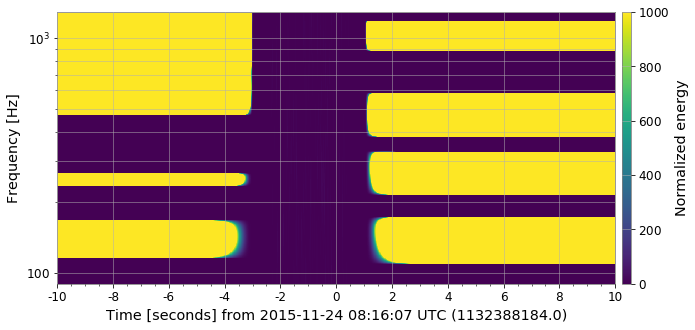

In [600]:
qtrans = white.q_transform(
    whiten=False, # already white
    #qrange=(4, 150),  # wider Q-transform range
    #outseg=(1133090460.5, 1133090460.8),  # region of interest
    outseg=(1132388184-10, 1132388184+10)  # region of interest
)
plot = qtrans.imshow(figsize=[10, 5])
ax = plot.gca()
ax.set_xscale('seconds')
ax.set_yscale('log')
ax.set_epoch(1132388184)
ax.set_ylabel('Frequency [Hz]')
#ax.set_ylim(0, 6*1e3)
ax.grid(True, axis='y', which='both')
ax.colorbar(cmap='viridis', label='Normalized energy', clim=[0, 1000])
plot.show()

In [0]:
white = data_noise.whiten(2, 1)